# BA820 Project Proposal: Mapping the Economic Burden of Childcare Across US Counties

**Project Title**: Mapping the Economic Burden of Childcare Across US Counties

**Section and Team Number**: B1 Team 9

**Student name:** Mokhinur Talibzhanova

**Members**: Kara Liao, Li-Hsin Chang, Mokhinur Talibzhanova, Nathan Dai-Yin Leung

## Environment Setup

In [ ]:
from google.colab import data_table
from google.colab import drive
import pandas as pd

# Enable the interactive table feature
data_table.enable_dataframe_formatter()

# Access Google Drive
drive.mount('/content/drive')

# Read the CSV from your Drive
df = pd.read_csv("/content/drive/MyDrive/childcare_costs.csv")

df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53


## Data Cleaning

In [ ]:
df.columns

Index(['county_fips_code', 'study_year', 'unr_16', 'funr_16', 'munr_16',
       'unr_20to64', 'funr_20to64', 'munr_20to64', 'flfpr_20to64',
       'flfpr_20to64_under6', 'flfpr_20to64_6to17',
       'flfpr_20to64_under6_6to17', 'mlfpr_20to64', 'pr_f', 'pr_p', 'mhi_2018',
       'me_2018', 'fme_2018', 'mme_2018', 'total_pop', 'one_race',
       'one_race_w', 'one_race_b', 'one_race_i', 'one_race_a', 'one_race_h',
       'one_race_other', 'two_races', 'hispanic', 'households',
       'h_under6_both_work', 'h_under6_f_work', 'h_under6_m_work',
       'h_under6_single_m', 'h_6to17_both_work', 'h_6to17_fwork',
       'h_6to17_mwork', 'h_6to17_single_m', 'emp_m', 'memp_m', 'femp_m',
       'emp_service', 'memp_service', 'femp_service', 'emp_sales',
       'memp_sales', 'femp_sales', 'emp_n', 'memp_n', 'femp_n', 'emp_p',
       'memp_p', 'femp_p', 'mcsa', 'mfccsa', 'mc_infant', 'mc_toddler',
       'mc_preschool', 'mfcc_infant', 'mfcc_toddler', 'mfcc_preschool'],
      dtype='object')

In [ ]:
childcare = df.copy()

In [ ]:
childcare = childcare[
    (childcare["mc_infant"] > 0) &
    (childcare["mhi_2018"] > 0)
]

In [ ]:
childcare.shape
childcare[["mc_infant","mhi_2018"]].describe()

,mc_infant,mhi_2018
count,23593.000000,23593.000000
mean,146.051770,50631.312692
std,53.698566,13407.444469
min,27.730000,19841.920000
25%,108.750000,41998.000000
50%,134.500000,48634.920000
75%,166.330000,56421.300000
max,470.000000,136268.000000


In [ ]:
childcare.isna().sum().sort_values(ascending=False)

,0
mfccsa,251
mfcc_infant,251
mfcc_toddler,251
mfcc_preschool,251
county_fips_code,0
...,...
femp_n,0
mc_toddler,0
mc_infant,0
mcsa,0


In [ ]:
childcare_clean = childcare.dropna(
    subset=["mfcc_infant", "mfcc_toddler", "mfcc_preschool"]
)

In [ ]:
childcare_clean.isna().sum().sort_values(ascending=False)

,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
...,...
mc_toddler,0
mc_preschool,0
mfcc_infant,0
mfcc_toddler,0


In [ ]:
childcare_clean.duplicated(
    subset=["county_fips_code","study_year"]
).sum()

np.int64(0)

In [ ]:
childcare_clean.dtypes

,0
county_fips_code,int64
study_year,int64
unr_16,float64
funr_16,float64
munr_16,float64
...,...
mc_toddler,float64
mc_preschool,float64
mfcc_infant,float64
mfcc_toddler,float64


In [ ]:
childcare_clean["mc_infant"].describe()
childcare_clean["mhi_2018"].describe()

,mhi_2018
count,23342.000000
mean,50428.437534
std,13158.072756
min,19841.920000
25%,41946.270000
50%,48541.050000
75%,56204.135000
max,136268.000000


In [ ]:
childcare_clean

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
0,1001,2008,5.42,4.41,6.32,4.6,3.5,5.6,68.9,66.9,...,21.55,4.07,80.92,81.40,104.95,104.95,85.92,83.45,83.45,81.40
1,1001,2009,5.93,5.72,6.11,4.8,4.6,5.0,70.8,63.7,...,21.96,5.19,83.42,85.68,105.11,105.11,87.59,87.39,87.39,85.68
2,1001,2010,6.21,5.57,6.78,5.1,4.6,5.6,71.3,67.0,...,21.28,4.13,85.92,89.96,105.28,105.28,89.26,91.33,91.33,89.96
3,1001,2011,7.55,8.13,7.03,6.2,6.3,6.1,70.2,66.5,...,22.80,4.77,88.43,94.25,105.45,105.45,90.93,95.28,95.28,94.25
4,1001,2012,8.60,8.88,8.29,6.7,6.4,7.0,70.6,67.1,...,22.88,4.84,90.93,98.53,105.61,105.61,92.60,99.22,99.22,98.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34562,56045,2014,3.60,5.36,2.28,2.4,4.8,0.6,75.9,74.8,...,23.55,6.13,91.14,112.94,147.36,120.38,123.99,110.71,110.71,111.47
34563,56045,2015,5.16,7.86,3.16,4.2,7.6,1.6,73.2,82.0,...,27.26,6.36,94.76,110.89,140.36,118.77,118.77,110.89,110.89,110.89
34564,56045,2016,3.61,4.67,2.79,3.4,4.5,2.6,69.7,68.1,...,24.55,6.72,98.38,108.85,133.37,117.16,113.55,114.10,111.07,110.31
34565,56045,2017,2.24,2.64,1.95,2.3,2.8,2.0,71.4,63.6,...,30.26,4.23,102.01,106.81,126.38,115.55,108.32,117.30,111.26,109.74


## Preprocessing

**Dataset Overview**

Evaluates scale differences and detects potential extreme economic values that may distort distance-based learning.

In [ ]:
childcare_clean.describe().T.sort_values("std", ascending=False)

,count,mean,std,min,25%,50%,75%,max
total_pop,23342.0,108769.195442,361145.678692,41.0,11740.25,27517.00,70395.75,10105722.00
households,23342.0,40267.230272,125946.314168,22.0,4480.00,10596.50,26821.50,3306109.00
h_6to17_both_work,23342.0,7087.891226,21909.614752,0.0,698.00,1737.00,4664.75,590730.00
h_6to17_single_m,23342.0,4281.334504,15757.372243,0.0,374.00,965.00,2503.75,436538.00
county_fips_code,23342.0,33273.162411,15581.597214,1001.0,21043.00,38005.00,48088.50,56045.00
...,...,...,...,...,...,...,...,...
one_race_a,23342.0,1.201698,2.430262,0.0,0.20,0.50,1.20,44.50
one_race,23342.0,97.868127,1.866396,76.5,97.40,98.30,98.90,100.00
two_races,23342.0,2.131882,1.866393,0.0,1.10,1.70,2.60,23.50
femp_n,23342.0,1.332695,1.387534,0.0,0.58,0.97,1.61,27.27


### Missing Value Validation

A missing value audit was conducted to confirm data completeness following earlier dataset cleaning.

In [ ]:
childcare_clean.isna().sum().sort_values(ascending=False).head(10)

,0
county_fips_code,0
study_year,0
unr_16,0
funr_16,0
munr_16,0
unr_20to64,0
funr_20to64,0
munr_20to64,0
flfpr_20to64,0
flfpr_20to64_under6,0


### Feature Scaling

Feature scaling was applied because EDA revealed substantial magnitude differences across economic variables, which would otherwise distort similarity-based structure discovery methods.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
childcare_scaled = scaler.fit_transform(childcare_clean)


### Outlier Structure Check

Outlier structure was evaluated to determine whether extreme counties represented meaningful structural variation or statistical noise.

Skewness analysis indicated extreme right-tailed distributions across multiple demographic count variables. Log transformation was applied to reduce scale dominance and improve structural comparability across counties for downstream unsupervised analysis.


In [ ]:
Q1 = childcare_clean.quantile(0.25)
Q3 = childcare_clean.quantile(0.75)
IQR = Q3 - Q1

outlier_counts = ((childcare_clean < (Q1 - 1.5*IQR)) |
                  (childcare_clean > (Q3 + 1.5*IQR))).sum()

outlier_counts.sort_values(ascending=False).head(10)

,0
h_under6_both_work,3282
h_6to17_both_work,3187
h_6to17_single_m,3152
households,3150
total_pop,3144
h_under6_f_work,3112
one_race_i,3078
h_6to17_fwork,3057
h_under6_single_m,3002
hispanic,2873


In [ ]:
childcare_clean.skew().sort_values(ascending=False).head(10)


,0
one_race_h,21.134522
h_6to17_fwork,15.011260
h_6to17_single_m,14.061347
total_pop,13.798265
h_under6_single_m,13.695900
h_under6_f_work,13.691965
h_6to17_mwork,13.579488
h_under6_m_work,12.462552
households,12.407313
h_6to17_both_work,11.785797


In [47]:
count_cols = [
    "total_pop",
    "households",
    "one_race_h",
    "h_6to17_fwork",
    "h_6to17_single_m",
    "h_under6_single_m",
    "h_under6_f_work",
    "h_6to17_mwork"
]

In [48]:
import numpy as np

for col in count_cols:
    childcare_clean[col] = np.log1p(childcare_clean[col])

### Feature Correlation Structure and Dimensional Redundancy Assessment

A correlation matrix was analyzed to evaluate relationships between demographic, workforce, income, and childcare cost variables. This step was performed to identify potential dimensional redundancy and assess whether multiple variables capture overlapping structural information relevant to county-level economic patterns.


In [ ]:
corr_matrix = childcare_clean.corr()

corr_matrix.head()

,county_fips_code,study_year,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
county_fips_code,1.000000,-0.003441,-0.192504,-0.198530,-0.163612,-0.186199,-0.194359,-0.154841,0.046008,-0.054157,...,-0.041162,-0.073897,0.047549,0.027433,-0.001224,0.002722,0.047248,0.040644,0.008385,0.012400
study_year,-0.003441,1.000000,-0.085766,-0.071557,-0.085864,-0.057465,-0.044716,-0.059287,-0.049111,0.087816,...,0.033073,-0.019708,0.202344,0.193961,0.167900,0.200284,0.199025,0.189563,0.206976,0.202644
unr_16,-0.192504,-0.085766,1.000000,0.905365,0.947088,0.984926,0.882193,0.924947,-0.421780,-0.127796,...,0.167681,0.159405,-0.083038,-0.094544,-0.068966,-0.094497,-0.098964,-0.082701,-0.084858,-0.093978
funr_16,-0.198530,-0.071557,0.905365,1.000000,0.723552,0.886050,0.971759,0.701797,-0.400655,-0.127326,...,0.162822,0.167081,-0.104568,-0.111397,-0.090508,-0.117140,-0.119431,-0.095425,-0.099245,-0.108817
munr_16,-0.163612,-0.085864,0.947088,0.723552,1.000000,0.936981,0.707089,0.980154,-0.383633,-0.109562,...,0.150618,0.132792,-0.055193,-0.068747,-0.042623,-0.064062,-0.069745,-0.061641,-0.062388,-0.070013


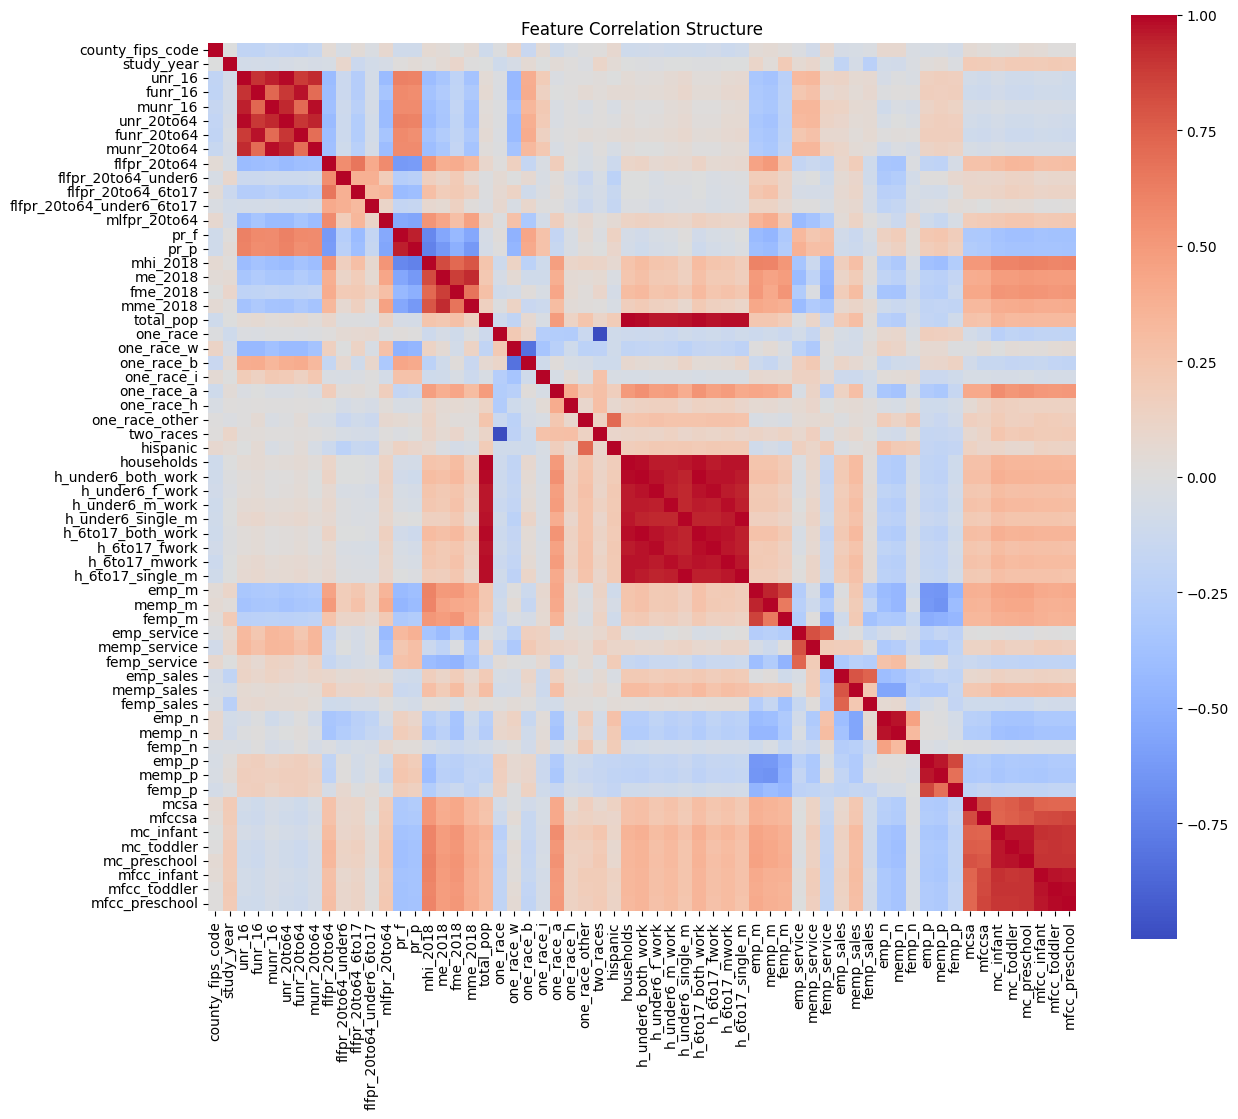

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14,12))

sns.heatmap(
    corr_matrix,
    cmap="coolwarm",
    center=0,
    square=True
)

plt.title("Feature Correlation Structure")
plt.show()


# EDA observations

*Q1: Do childcare costs vary structurally across counties?*

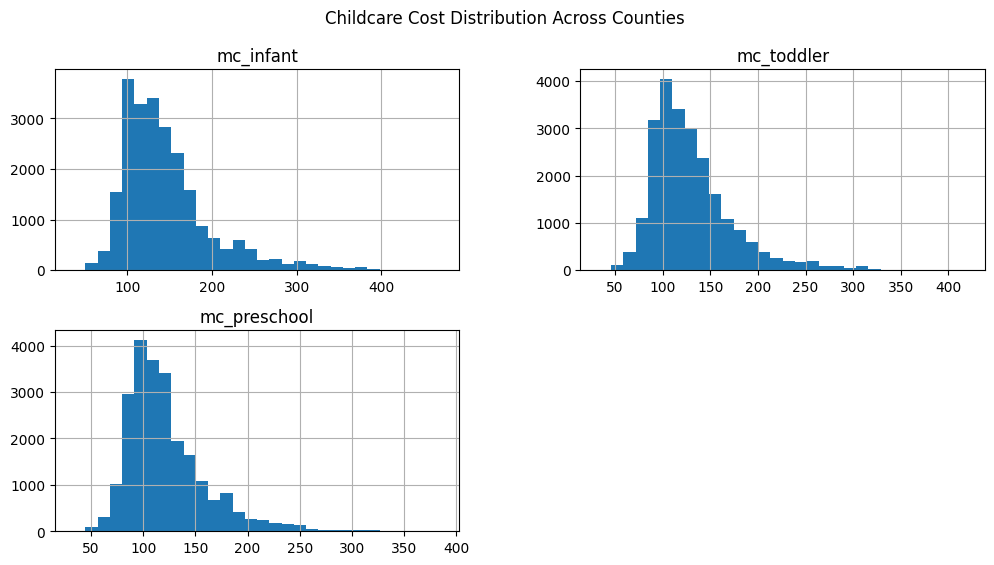

In [49]:
cost_cols = ["mc_infant", "mc_toddler", "mc_preschool"]

childcare_clean[cost_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Childcare Cost Distribution Across Counties")
plt.show()


*Q2: Does childcare affordability scale proportionally with household income?*

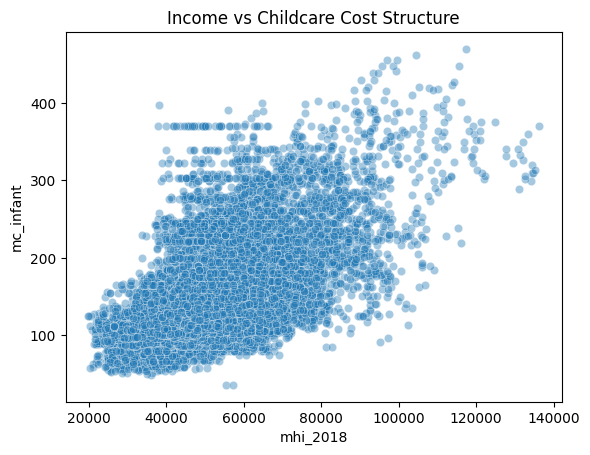

In [50]:
sns.scatterplot(
    data=childcare_clean,
    x="mhi_2018",
    y="mc_infant",
    alpha=0.4
)

plt.title("Income vs Childcare Cost Structure")
plt.show()


*Q3: Does labor market composition relate to childcare affordability structure?*

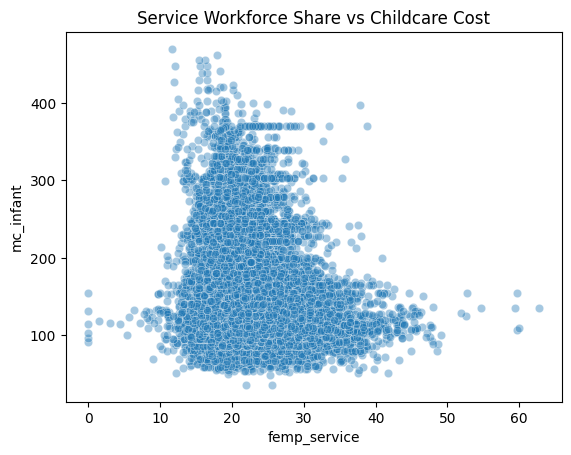

In [52]:
sns.scatterplot(
    data=childcare_clean,
    x="femp_service",
    y="mc_infant",
    alpha=0.4
)

plt.title("Service Workforce Share vs Childcare Cost")
plt.show()

*Q4: Do features show structural redundancy that suggests latent economic structure?*

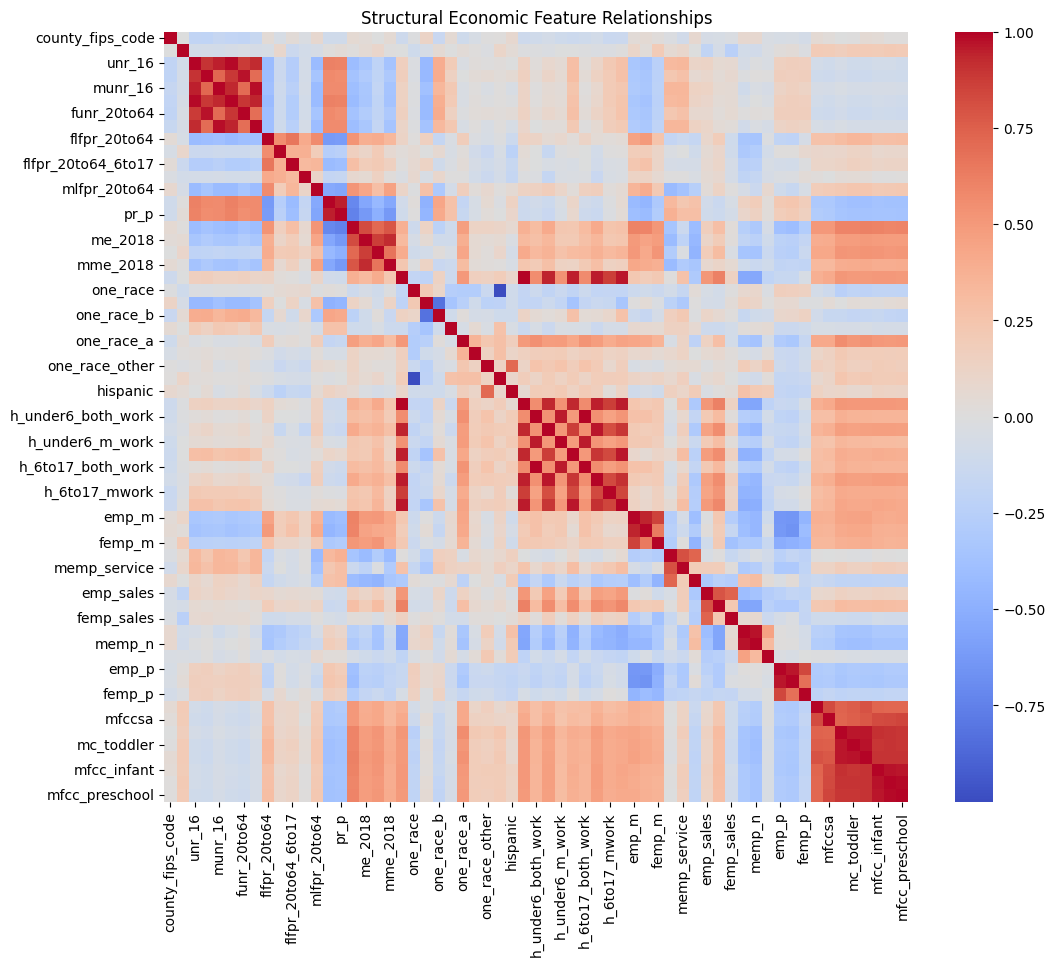

In [53]:
plt.figure(figsize=(12,10))
sns.heatmap(childcare_clean.corr(), cmap="coolwarm", center=0)
plt.title("Structural Economic Feature Relationships")
plt.show()

*Q5: Can childcare affordability structure be represented in lower-dimensional latent space?*

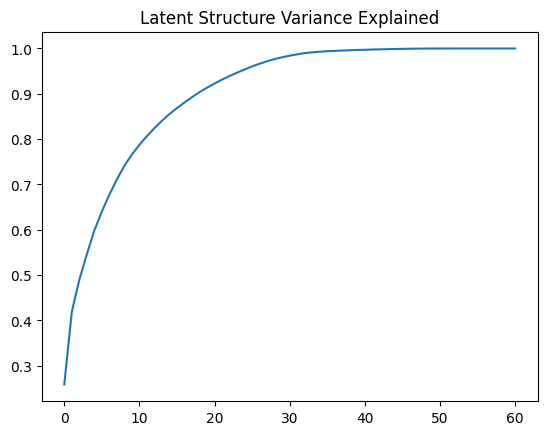

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(childcare_clean)

pca = PCA()
pca.fit(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title("Latent Structure Variance Explained")
plt.show()


*Q6: Do similarity relationships exist that support clustering?*

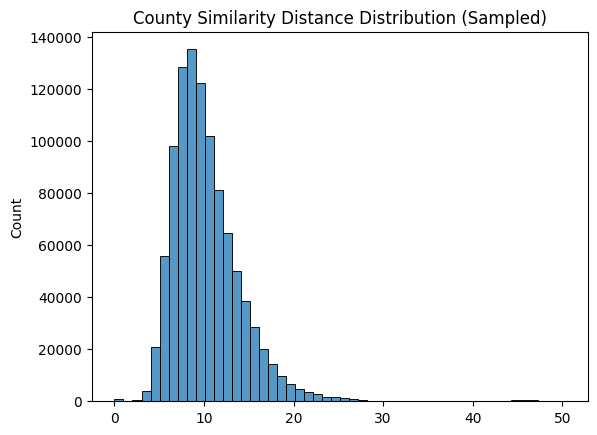

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns

X = childcare_clean.select_dtypes(include=[np.number]).drop(
    columns=["county_fips_code", "study_year"], errors="ignore"
).dropna()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

sample_size = min(1000, X_scaled.shape[0])
rng = np.random.default_rng(42)
sample_idx = rng.choice(X_scaled.shape[0], size=sample_size, replace=False)

D = pairwise_distances(X_scaled[sample_idx], metric="euclidean")

sns.histplot(D.ravel(), bins=50)
plt.title("County Similarity Distance Distribution (Sampled)")
plt.show()


# Analysis & Experiments

###Final Modeling Dataset Structure:

The final modeling dataset includes 23,342 county observations and 59 numeric features, providing sufficient structure for clustering-based affordability pattern analysis.

In [4]:
import numpy as np
import pandas as pd

X = childcare_clean.select_dtypes(include=[np.number]).copy()
X = X.drop(columns=["county_fips_code", "study_year"], errors="ignore")
X = X.dropna()

print("Shape:", X.shape)
print("Columns:", len(X.columns))

Shape: (23342, 59)
Columns: 59


### Feature Standardization for Distance-Based Clustering:

All features were standardized to a common scale, ensuring clustering results reflect structural socioeconomic similarity rather than differences in variable magnitude.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Dimensionality Reduction Using PCA:

PCA reduced the feature space to 18 components while preserving 90% of total variance, indicating substantial correlation structure across socioeconomic and childcare variables.

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.90, random_state=42)  # keep 90% variance
X_pca = pca.fit_transform(X_scaled)

print("PCA components:", X_pca.shape[1])

PCA components: 18


### Optimal Cluster Number Selection Using KMeans (Elbow and Silhouette Analysis):

Both inertia and silhouette analysis indicate weak but most stable separation at k = 2, suggesting counties broadly divide into two primary structural childcare affordability groups rather than multiple sharply distinct clusters.

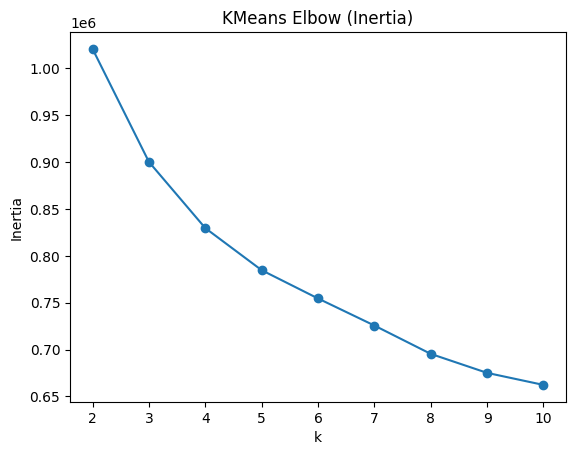

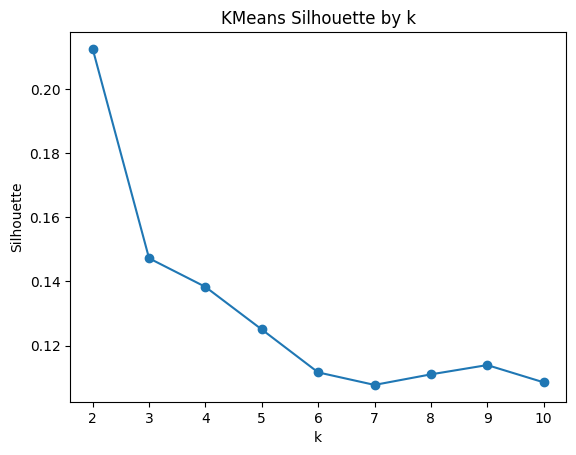

Best k by silhouette: 2


In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

ks = range(2, 11)
inertias, silhouettes = [], []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init="auto")
    labels = km.fit_predict(X_pca)  # use X_scaled if you skip PCA
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pca, labels))

plt.plot(list(ks), inertias, marker="o")
plt.title("KMeans Elbow (Inertia)")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.show()

plt.plot(list(ks), silhouettes, marker="o")
plt.title("KMeans Silhouette by k")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.show()

k_best = list(ks)[int(np.argmax(silhouettes))]
print("Best k by silhouette:", k_best)

### Final County Segmentation Using KMeans Clustering:
The final model segmented counties into two primary affordability structure clusters, with one larger baseline group (17,470 counties) and one smaller distinct structural group (5,872 counties), indicating meaningful but uneven distribution of childcare affordability patterns across counties.

In [8]:
k_final = k_best  # or manually set after reviewing plots
km_final = KMeans(n_clusters=k_final, random_state=42, n_init="auto")
clusters_km = km_final.fit_predict(X_pca)

print(pd.Series(clusters_km).value_counts().sort_index())

0    17470
1     5872
Name: count, dtype: int64


### Cluster Separation Visualization in Latent PCA Space:

The 2D PCA projection shows clear directional separation between the two clusters, indicating that counties differ along a primary structural socioeconomic gradient driving childcare affordability patterns.

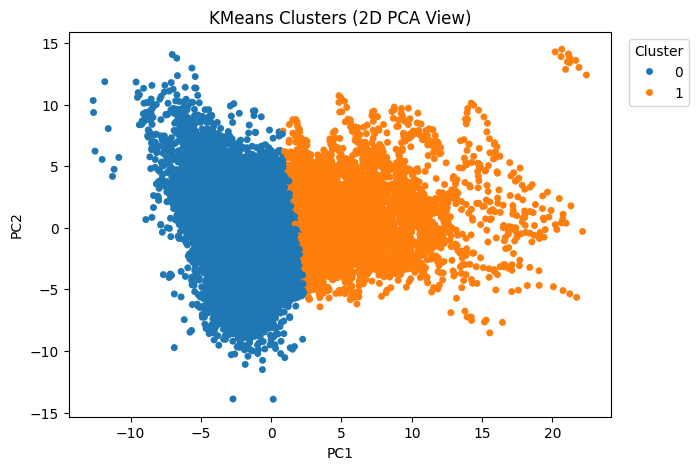

In [9]:
from sklearn.decomposition import PCA
import seaborn as sns

pca2 = PCA(n_components=2, random_state=42)
Z = pca2.fit_transform(X_scaled)

plt.figure(figsize=(7,5))
sns.scatterplot(x=Z[:,0], y=Z[:,1], hue=clusters_km, palette="tab10", s=25, linewidth=0)
plt.title("KMeans Clusters (2D PCA View)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.show()

### Economic and Childcare Affordability Cluster Profiling:
Cluster profiling reveals clear structural socioeconomic differences, with one cluster showing higher income, employment participation, and economic scale indicators, suggesting lower relative childcare affordability pressure compared to the lower-income structural cluster.

In [12]:
profiles = X.copy()
profiles["cluster"] = clusters_km

summary_mean = profiles.groupby("cluster").mean().round(3)
summary_median = profiles.groupby("cluster").median().round(3)
sizes = profiles["cluster"].value_counts().sort_index()

print("Cluster sizes:\n", sizes)
summary_mean

Cluster sizes:
 cluster
0    17470
1     5872
Name: count, dtype: int64


,unr_16,funr_16,munr_16,unr_20to64,funr_20to64,munr_20to64,flfpr_20to64,flfpr_20to64_under6,flfpr_20to64_6to17,flfpr_20to64_under6_6to17,...,memp_p,femp_p,mcsa,mfccsa,mc_infant,mc_toddler,mc_preschool,mfcc_infant,mfcc_toddler,mfcc_preschool
cluster,,,,,,,,,,,,,,,,,,,,,
0,7.651,7.176,8.081,7.109,6.636,7.532,68.174,67.927,77.604,66.361,...,25.336,7.973,90.338,83.615,125.110,113.675,107.259,101.085,95.607,93.545
1,7.136,6.721,7.518,6.526,6.137,6.886,73.673,70.480,80.166,67.590,...,18.128,5.540,133.495,118.812,206.938,178.944,165.569,149.995,139.796,135.712


### Childcare Cost and Income Differences Across Clusters:
The higher-income cluster also shows substantially higher childcare costs across all age groups, indicating that childcare markets scale strongly with local income levels rather than being uniformly distributed across counties.

In [11]:
key_cols = [c for c in ["mc_infant","mc_toddler","mc_preschool","mhi_2018"] if c in summary_mean.columns]
summary_mean[key_cols] if key_cols else summary_mean.head()

,mc_infant,mc_toddler,mc_preschool,mhi_2018
cluster,,,,
0,125.110,113.675,107.259,46011.709
1,206.938,178.944,165.569,63568.808


## Interpretation of the results

The presence of two dominant clusters suggests that U.S. counties are primarily divided along a baseline economic gradient, where childcare cost levels increase alongside income and labor market strength, rather than forming many highly fragmented affordability regimes.

**Clustering results show that counties broadly separate into:**

Cluster 0 — Lower-Cost / Lower-Income Structural Counties

* Lower median household income (~$46K)

* Lower childcare costs across infant, toddler, and preschool care

* Lower overall labor market scale and participation indicators

Cluster 1 — Higher-Cost / Higher-Income Structural Counties
* Higher median household income (~$63K)

* Significantly higher childcare costs across all age groups

* Stronger labor force participation and economic scale characteristics

**Structural Insight:**

The results indicate that childcare affordability does not exist as isolated cost variation, but instead follows broader regional socioeconomic economic structure.

Childcare markets appear to scale with:

* Local income capacity

* Labor market strength

* Economic density and workforce composition